In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [3]:
import os
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch
import torchvision.transforms as transforms

class CustomDataset(Dataset):
    def __init__(self, images_dir, labels_dir, transform=None):
        self.images_dir = images_dir
        self.labels_dir = labels_dir
        self.transform = transform
        self.image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.images_dir, self.image_files[idx])
        label_path = os.path.join(self.labels_dir, self.image_files[idx].replace('.jpg', '.txt'))
        
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        
        with open(label_path, 'r') as f:
            label = int(f.readline().split()[0])  # Leer la primera línea y obtener la clase
        
        return image, label

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(40, expand=True),
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

train_dataset = CustomDataset(images_dir='train/images', labels_dir='train/labels', transform=transform)
valid_dataset = CustomDataset(images_dir='valid/images', labels_dir='valid/labels', transform=transform)
test_dataset = CustomDataset(images_dir='test/images', labels_dir='test/labels', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [4]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision
import numpy as np

class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 16 * 16, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)  # Aumentar la tasa de abandono

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 16 * 16)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Cargar las clases desde el archivo classes.txt
with open('classes.txt', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

num_classes = len(classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNModel(num_classes).to(device)

Epoch [1/100], Train Loss: 2.4340
Epoch [1/100], Validation Loss: 2.3340
Epoch [2/100], Train Loss: 2.1823
Epoch [2/100], Validation Loss: 2.1736
Epoch [3/100], Train Loss: 2.0827
Epoch [3/100], Validation Loss: 2.1549
Predicted: tensor([3, 3, 2, 5], device='cuda:0')
GroundTruth: tensor([3, 3, 2, 5], device='cuda:0')


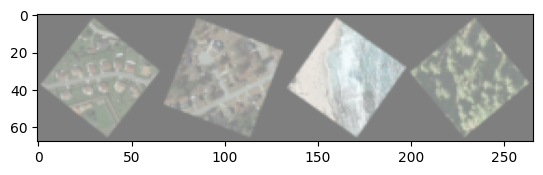

Epoch [4/100], Train Loss: 1.9777
Epoch [4/100], Validation Loss: 1.9829
Epoch [5/100], Train Loss: 1.8663
Epoch [5/100], Validation Loss: 2.0000
Epoch [6/100], Train Loss: 1.8351
Epoch [6/100], Validation Loss: 1.9497
Predicted: tensor([5, 3, 3, 5], device='cuda:0')
GroundTruth: tensor([6, 3, 9, 6], device='cuda:0')


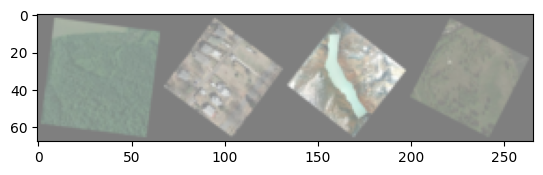

Epoch [7/100], Train Loss: 1.7374
Epoch [7/100], Validation Loss: 1.9556
Epoch [8/100], Train Loss: 1.7273
Epoch [8/100], Validation Loss: 1.8682
Epoch [9/100], Train Loss: 1.6529
Epoch [9/100], Validation Loss: 1.7562
Predicted: tensor([ 3, 11,  5,  5], device='cuda:0')
GroundTruth: tensor([ 3, 11,  5,  5], device='cuda:0')


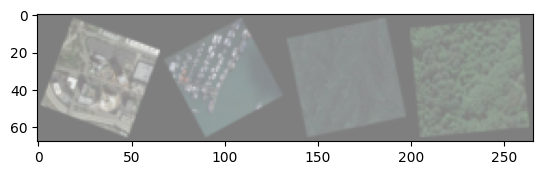

Epoch [10/100], Train Loss: 1.5852
Epoch [10/100], Validation Loss: 1.7596
Epoch [11/100], Train Loss: 1.5837
Epoch [11/100], Validation Loss: 1.8938
Epoch [12/100], Train Loss: 1.5708
Epoch [12/100], Validation Loss: 1.6835
Predicted: tensor([11,  3,  2,  5], device='cuda:0')
GroundTruth: tensor([11,  3,  2, 13], device='cuda:0')


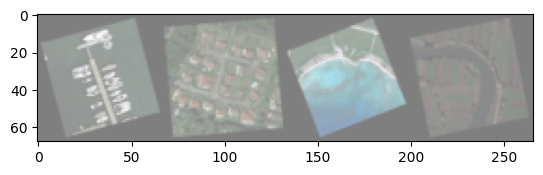

Epoch [13/100], Train Loss: 1.4899
Epoch [13/100], Validation Loss: 1.7935
Epoch [14/100], Train Loss: 1.4745
Epoch [14/100], Validation Loss: 1.7742
Epoch [15/100], Train Loss: 1.4405
Epoch [15/100], Validation Loss: 1.6755
Predicted: tensor([ 3,  4, 10,  4], device='cuda:0')
GroundTruth: tensor([3, 4, 7, 9], device='cuda:0')


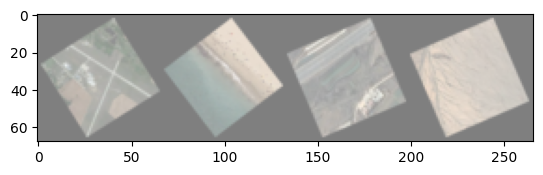

Epoch [16/100], Train Loss: 1.4036
Epoch [16/100], Validation Loss: 1.6512
Epoch [17/100], Train Loss: 1.3967
Epoch [17/100], Validation Loss: 1.6786
Epoch [18/100], Train Loss: 1.4039
Epoch [18/100], Validation Loss: 1.7393
Predicted: tensor([3, 5, 4, 0], device='cuda:0')
GroundTruth: tensor([11,  5,  4,  0], device='cuda:0')


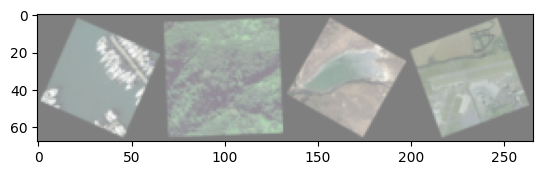

Epoch [19/100], Train Loss: 1.3816
Epoch [19/100], Validation Loss: 1.7152
Epoch [20/100], Train Loss: 1.3350
Epoch [20/100], Validation Loss: 1.6366
Epoch [21/100], Train Loss: 1.2787
Epoch [21/100], Validation Loss: 1.6295
Predicted: tensor([ 1, 10, 12,  9], device='cuda:0')
GroundTruth: tensor([ 4, 12,  3,  6], device='cuda:0')


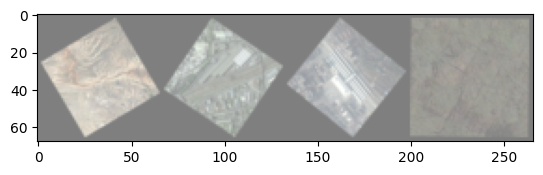

Epoch [22/100], Train Loss: 1.2690
Epoch [22/100], Validation Loss: 1.6171
Epoch [23/100], Train Loss: 1.2804
Epoch [23/100], Validation Loss: 1.6712
Epoch [24/100], Train Loss: 1.2643
Epoch [24/100], Validation Loss: 1.6914
Predicted: tensor([6, 2, 6, 7], device='cuda:0')
GroundTruth: tensor([6, 2, 6, 9], device='cuda:0')


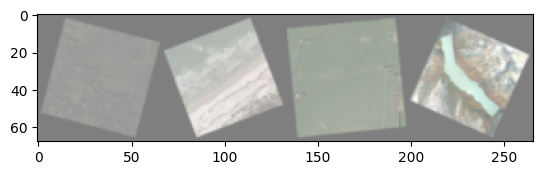

Epoch [25/100], Train Loss: 1.2266
Epoch [25/100], Validation Loss: 1.6271
Epoch [26/100], Train Loss: 1.2648
Epoch [26/100], Validation Loss: 1.6276
Epoch [27/100], Train Loss: 1.1639
Epoch [27/100], Validation Loss: 1.6787
Predicted: tensor([7, 6, 3, 1], device='cuda:0')
GroundTruth: tensor([3, 6, 9, 1], device='cuda:0')


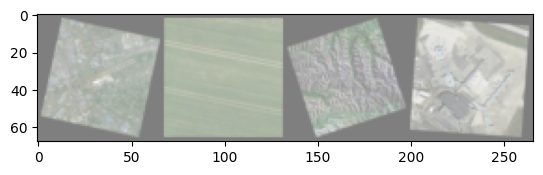

Epoch [28/100], Train Loss: 1.0946
Epoch [28/100], Validation Loss: 1.5854
Epoch [29/100], Train Loss: 1.0881
Epoch [29/100], Validation Loss: 1.6809
Epoch [30/100], Train Loss: 1.1168
Epoch [30/100], Validation Loss: 1.7636
Predicted: tensor([8, 0, 8, 5], device='cuda:0')
GroundTruth: tensor([8, 7, 8, 7], device='cuda:0')


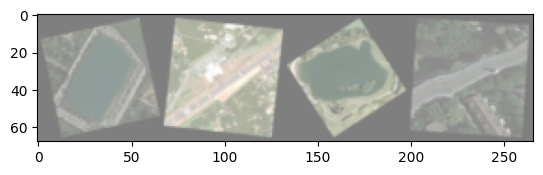

Epoch [31/100], Train Loss: 1.0927
Epoch [31/100], Validation Loss: 1.6084
Epoch [32/100], Train Loss: 1.0673
Epoch [32/100], Validation Loss: 1.6522
Epoch [33/100], Train Loss: 0.9978
Epoch [33/100], Validation Loss: 1.7222
Predicted: tensor([ 1,  2, 11,  1], device='cuda:0')
GroundTruth: tensor([ 1,  1, 11,  1], device='cuda:0')


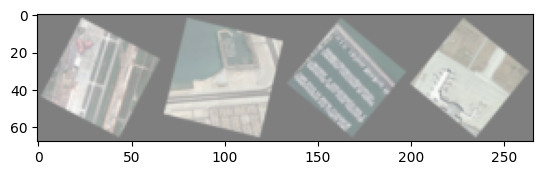

Epoch [34/100], Train Loss: 0.9857
Epoch [34/100], Validation Loss: 1.6139
Epoch [35/100], Train Loss: 0.9933
Epoch [35/100], Validation Loss: 1.6485
Epoch [36/100], Train Loss: 0.9705
Epoch [36/100], Validation Loss: 1.6005
Predicted: tensor([1, 9, 7, 9], device='cuda:0')
GroundTruth: tensor([ 7,  3,  3, 12], device='cuda:0')


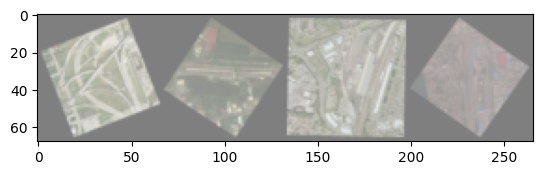

Epoch [37/100], Train Loss: 0.9460
Epoch [37/100], Validation Loss: 1.7051
Epoch [38/100], Train Loss: 0.9314
Epoch [38/100], Validation Loss: 1.6303
Epoch [39/100], Train Loss: 0.9441
Epoch [39/100], Validation Loss: 1.6582
Predicted: tensor([12,  1,  0,  0], device='cuda:0')
GroundTruth: tensor([12,  1,  0,  6], device='cuda:0')


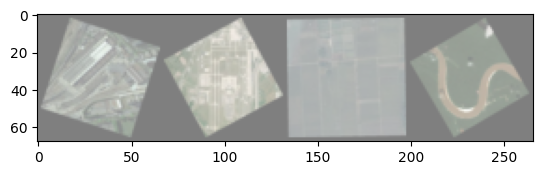

Epoch [40/100], Train Loss: 0.9334


In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # Añadir weight_decay para L2 regularization

num_epochs = 100
best_valid_loss = float('inf')
patience = 5
train_losses = []
valid_losses = []
trigger_times = 0

def imshow(img):
    img = img / 2 + 0.5  # Desnormalizar
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Mover los datos a CUDA
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}')
    
    # Calcular la pérdida de validación
    model.eval()
    valid_loss = 0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()
    valid_loss /= len(valid_loader)
    valid_losses.append(valid_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {valid_loss:.4f}')
    
    # Ajustar la tasa de aprendizaje
    scheduler.step(valid_loss)
    
    # Early Stopping
    
    # Visualizar las imágenes y predicciones cada 3 épocas
    if (epoch + 1) % 3 == 0:
        with torch.no_grad():
            inputs, labels = next(iter(train_loader))
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            print(f'Predicted: {predicted[:4]}')
            print(f'GroundTruth: {labels[:4]}')
            imshow(torchvision.utils.make_grid(inputs.cpu()[:4]))

# Graficar las pérdidas de entrenamiento y validación
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.eval()
valid_loss = 0
with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Mover los datos a CUDA
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        valid_loss += loss.item()
valid_loss /= len(valid_loader)
print(f'Validation Loss: {valid_loss:.4f}')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_image(img_tensor, title=None):
    
    img = img_tensor / 2 + 0.5  # Desnormalizar si es necesario
    npimg = img.numpy()
    img = np.transpose(npimg, (1, 2, 0))
    img = (img * 255).astype(np.uint8)  # Convertir a uint8
    img = Image.fromarray(img)
    print(title)
    img.show(title=title)

# Seleccionar 10 imágenes aleatorias del conjunto de validación
model.eval()
images, labels = next(iter(valid_loader))
images, labels = images.to(device), labels.to(device)

# Seleccionar 10 índices aleatorios
indices = np.random.choice(len(images), 20, replace=False)
selected_images = images[indices]
selected_labels = labels[indices]

# Obtener las predicciones del modelo
with torch.no_grad():
    outputs = model(selected_images)
    _, predicted = torch.max(outputs, 1)

# Mostrar las imágenes junto con las etiquetas reales y predichas
# Mostrar las imágenes junto con las etiquetas reales y predichas
for i in range(10):
    show_image(selected_images[i].cpu(), f'Real: {classes[selected_labels[i]]}, Predicted: {classes[predicted[i]]}')